### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [37]:
data = pd.read_csv('data/coupons.csv')

In [38]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [39]:
data.tail()

destination passanger weather  temperature time                 coupon  \
12679        Home   Partner   Rainy           55  6PM  Carry out & Take away   
12680        Work     Alone   Rainy           55  7AM  Carry out & Take away   
12681        Work     Alone   Snowy           30  7AM           Coffee House   
12682        Work     Alone   Snowy           30  7AM                    Bar   
12683        Work     Alone   Sunny           80  7AM      Restaurant(20-50)   

      expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
12679         1d   Male  26        Single  ...        never       1~3   
12680         1d   Male  26        Single  ...        never       1~3   
12681         1d   Male  26        Single  ...        never       1~3   
12682         1d   Male  26        Single  ...        never       1~3   
12683         2h   Male  26        Single  ...        never       1~3   

      RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
12679                  4~8              1~3                1   
12680                  4~8              1~3                1   
12681                  4~8              1~3                1   
12682                  4~8              1~3                1   
12683                  4~8              1~3                1   

      toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y  
12679                 0                 0              1             0  1  
12680                 0                 0              0             1  1  
12681                 0                 0              1             0  0  
12682                 1                 1              0             1  0  
12683                 0                 0              1             0  0  

[5 rows x 26 columns]

In [40]:
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

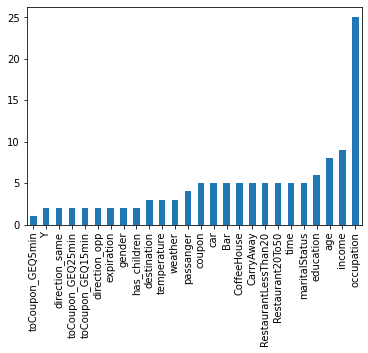

toCoupon_GEQ5min         1
Y                        2
direction_same           2
toCoupon_GEQ25min        2
toCoupon_GEQ15min        2
direction_opp            2
expiration               2
gender                   2
has_children             2
destination              3
temperature              3
weather                  3
passanger                4
coupon                   5
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
time                     5
maritalStatus            5
education                6
age                      8
income                   9
occupation              25
dtype: int64


In [42]:
# Plot a count of distinct elements
data.nunique(axis=0)
ax = data.nunique(axis=0).sort_values().plot(kind = 'bar')
fig = ax.get_figure()
plt.show()
fig.savefig('images/unique_plot.png')
print(data.nunique(axis=0).sort_values())

2. Investigate the dataset for missing or problematic data.

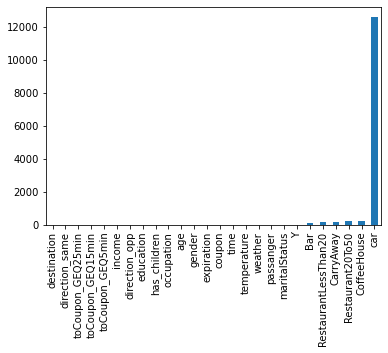

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


In [43]:
# show any missing value in columns and sorted by columns
ax = data.isnull().sum().sort_values().plot(kind = 'bar')
fig = ax.get_figure()
plt.show()
fig.savefig('images/missing_plot_.png')
print(data.isnull().sum().sort_values())

In [44]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [45]:
data.shape

(12684, 26)

3. Decide what to do about your missing data -- drop, replace, other...

In [46]:
#fill missing value with string "-1"
#Keep the DataFrame with valid entries in the same variable.
data.fillna("-1", inplace=True)
data

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3               Coffee House         2h  Female  21  Unmarried partner  ...   
4               Coffee House         1d  Female  21  Unmarried partner  ...   
...                      ...        ...     ...  ..                ...  ...   
12679  Carry out & Take away         1d    Male  26             Single  ...   
12680  Carry out & Take away         1d    Male  26             Single  ...   
12681           Coffee House         1d    Male  26             Single  ...   
12682                    Bar         1d    Male  26             Single  ...   
12683      Restaurant(20-50)         2h    Male  26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0            never        -1                  4~8              1~3   
1            never        -1                  4~8              1~3   
2            never        -1                  4~8              1~3   
3            never        -1                  4~8              1~3   
4            never        -1                  4~8              1~3   
...            ...       ...                  ...              ...   
12679        never       1~3                  4~8              1~3   
12680        never       1~3                  4~8              1~3   
12681        never       1~3                  4~8              1~3   
12682        never       1~3                  4~8              1~3   
12683        never       1~3                  4~8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                    1                 0                 0              0   
1                    1                 0                 0              0   
2                    1                 1                 0              0   
3                    1                 1                 0              0   
4                    1                 1                 0              0   
...                ...               ...               ...            ...   
12679                1                 0                 0              1   
12680                1                 0                 0              0   
12681                1                 0                 0              1   
12682                1                 1                 1              0   
12683                1                 0                 0              1   

      direction_opp  Y  
0                 1  1  
1                 1  0  
2                 1  1  
3                 1  0  
4                 1  0  
...             ... ..  
12679             0  1  
12680             1  1  
12681             0  0  
12682             1  0  
12683             0  0  

[12684 rows x 26 columns]

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
car                     0
income                  0
occupation              0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
direction_opp           0
Y                       0
dtype: int64


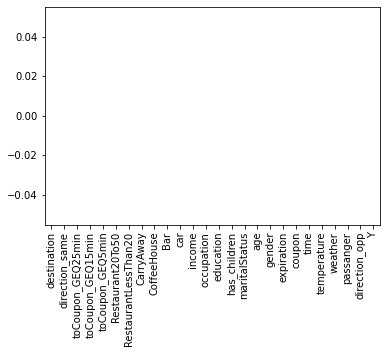

In [47]:
# show any missing values in columns and sorted by columns
# There shall be no missing values
data.isnull().sum().sort_values().plot(kind = 'bar')
print(data.isnull().sum().sort_values())
plt.show()

4. What proportion of the total observations chose to accept the coupon? 



In [48]:
data['Y'].sum()/len(data)

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [49]:
# plot histogram of coupon hued by acceptance column "Y"
fig=px.histogram(data, x='coupon', color='Y', text_auto=True)
fig.show()
fig.write_image("images/histogram_coupon_hue.png")

In [50]:
# plot bar plot of coupon
fig = px.bar(data, x='coupon')
fig.show()
fig.write_image("images/histogram_coupon.png")

6. Use a histogram to visualize the temperature column.

In [51]:
data['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [52]:
fig=px.histogram(data, x='temperature', color='Y', text_auto=True)
fig.show()
fig.write_image("images/histogram_temperature.png")

The following are just preparing the dataset to be able to answer following questions

In [53]:
# check the data in "age" column
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [54]:
data['age'].replace(to_replace='50plus',  value=50, inplace=True)
data['age'].replace(to_replace='below21', value=20, inplace=True)
data['age']= pd.to_numeric(data['age'])
data['age'].value_counts()

21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

In [55]:
# check the value counts of the "income" column
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [56]:
# make the "income" column have only numeric data to be able to subset it
data['income'] = data['income'].astype(str)
data['income'].replace(to_replace='$100000 or More', value='$100000 - $100000', inplace=True)
data['income'].replace(to_replace='Less than $12500', value='0 - $12500', inplace=True)
data['income'] = data['income'].str.split('-').apply(lambda x: x[-1]) 
data['income'] = data['income'].str.split('$').apply(lambda x: x[-1]) 
data['income']= pd.to_numeric(data['income'])
data[data['income'] < 50000]

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12629             Home    Partner   Rainy           55   6PM   
12630             Work      Alone   Rainy           55   7AM   
12631             Work      Alone   Snowy           30   7AM   
12632             Work      Alone   Snowy           30   7AM   
12633             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender  age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female   21  Unmarried partner  ...   
1               Coffee House         2h  Female   21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female   21  Unmarried partner  ...   
3               Coffee House         2h  Female   21  Unmarried partner  ...   
4               Coffee House         1d  Female   21  Unmarried partner  ...   
...                      ...        ...     ...  ...                ...  ...   
12629  Carry out & Take away         1d  Female   21  Unmarried partner  ...   
12630  Carry out & Take away         1d  Female   21  Unmarried partner  ...   
12631           Coffee House         1d  Female   21  Unmarried partner  ...   
12632                    Bar         1d  Female   21  Unmarried partner  ...   
12633      Restaurant(20-50)         2h  Female   21  Unmarried partner  ...   

       CoffeeHouse CarryAway RestaurantLessThan20  Restaurant20To50  \
0            never        -1                  4~8               1~3   
1            never        -1                  4~8               1~3   
2            never        -1                  4~8               1~3   
3            never        -1                  4~8               1~3   
4            never        -1                  4~8               1~3   
...            ...       ...                  ...               ...   
12629          4~8       1~3                  1~3             less1   
12630          4~8       1~3                  1~3             less1   
12631          4~8       1~3                  1~3             less1   
12632          4~8       1~3                  1~3             less1   
12633          4~8       1~3                  1~3             less1   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                    1                 0                 0              0   
1                    1                 0                 0              0   
2                    1                 1                 0              0   
3                    1                 1                 0              0   
4                    1                 1                 0              0   
...                ...               ...               ...            ...   
12629                1                 0                 0              1   
12630                1                 0                 0              0   
12631                1                 0                 0              1   
12632                1                 1                 1              0   
12633                1                 0                 0              1   

      direction_opp  Y  
0                 1  1  
1                 1  0  
2                 1  1  
3                 1  0  
4                 1  0  
...             ... ..  
12629             0  1  
12630             1  1  
12631             0  1  
12632             1  0  
12633             0  0  

[6691 rows x 26 columns]

In [74]:
data['income'].value_counts()

37499     2013
24999     1831
49999     1805
100000    1736
62499     1659
12500     1042
99999      895
87499      857
74999      846
Name: income, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [57]:
data_bar_coupon=data[data['coupon'].str.contains('Bar')]
print(data_bar_coupon)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender  age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female   21  Unmarried partner  ...        never 

In [58]:
data_bar_coupon['coupon'].value_counts()

Bar    2017
Name: coupon, dtype: int64

In [59]:
data_bar_coupon.shape

(2017, 26)

2. What proportion of bar coupons were accepted?

In [60]:
data_bar_coupon['Y'].sum()/len(data_bar_coupon)

0.41001487357461575

In [61]:
# count the values in the Bar column
data_bar_coupon['Bar'].value_counts()

never    830
less1    570
1~3      397
4~8      150
gt8       49
-1        21
Name: Bar, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [62]:
ThreeOrLess = data_bar_coupon[data_bar_coupon['Bar'].str.contains('never') | data_bar_coupon['Bar'].str.contains('less1') | data_bar_coupon['Bar'].str.contains('1~3')]
FourOrMore = data_bar_coupon[data_bar_coupon['Bar'].str.contains('4~8') | data_bar_coupon['Bar'].str.contains('gt8')]
ThreeOrLess_s = ThreeOrLess['Y'].sum()
FourOrMore_s = FourOrMore['Y'].sum()
total = ThreeOrLess_s + FourOrMore_s
ThreeOrMoreAcceptanceRate = ThreeOrLess_s/total
FourOrMoreAcceptanceRate = FourOrMore_s/total
print(ThreeOrLess_s)
print(FourOrMore_s)
print(total)
print(ThreeOrMoreAcceptanceRate)
print(FourOrMoreAcceptanceRate)

666
153
819
0.8131868131868132
0.18681318681318682


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [63]:
MoreThanOnce = data_bar_coupon[data_bar_coupon['Bar'].str.contains('1~3') | data_bar_coupon['Bar'].str.contains('4~8') | data_bar_coupon['Bar'].str.contains('gt8')]
MoreThanOnce = MoreThanOnce[MoreThanOnce['age'] > 25]
MoreThanOnceAccpetance = MoreThanOnce['Y'].sum()/len(MoreThanOnce)
# Sum of Probability is 1. Others will be one minus those who (go to a bar more than once a month and are over the age of 25)
OthersAccpetance = 1-MoreThanOnceAccpetance
print(MoreThanOnceAccpetance)
print(OthersAccpetance)

0.6952380952380952
0.3047619047619048


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [64]:
MoreThanOnce['occupation'].value_counts()

Computer & Mathematical                      57
Unemployed                                   48
Sales & Related                              47
Office & Administrative Support              41
Management                                   39
Business & Financial                         23
Healthcare Practitioners & Technical         18
Arts Design Entertainment Sports & Media     16
Education&Training&Library                   14
Transportation & Material Moving             13
Protective Service                           12
Installation Maintenance & Repair            11
Healthcare Support                           11
Production Occupations                       10
Food Preparation & Serving Related            9
Legal                                         9
Student                                       7
Personal Care & Service                       7
Construction & Extraction                     7
Community & Social Services                   6
Retired                                 

In [65]:
# There is no farming, fishing, or foresty occupations
MoreThanOnce = data_bar_coupon[data_bar_coupon['Bar'].str.contains('1~3') | data_bar_coupon['Bar'].str.contains('4~8') | data_bar_coupon['Bar'].str.contains('gt8')]
MoreThanOnce = MoreThanOnce[~(MoreThanOnce['passanger'].str.contains('Kid\(s\)'))]
MoreThanOnce = MoreThanOnce[~(MoreThanOnce['occupation'].str.contains('farming') | MoreThanOnce['occupation'].str.contains('fishing') | MoreThanOnce['occupation'].str.contains('forestry') )]
MoreThanOnceAccpetance = MoreThanOnce['Y'].sum()/len(MoreThanOnce)
# Sum of Probability is 1. Others will be one minus those who (go to bars more than once a month 
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry)
OthersAccpetance = 1-MoreThanOnceAccpetance
print(MoreThanOnceAccpetance)
print(OthersAccpetance)

0.7132486388384754
0.28675136116152455


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [66]:
# check the value counts of the "maritalStatus" column
data_bar_coupon['maritalStatus'].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [67]:
# check the value counts of the "RestaurantLessThan20" column (cheap Restaurant)
data_bar_coupon['RestaurantLessThan20'].value_counts()

1~3      878
4~8      568
less1    325
gt8      186
never     37
-1        23
Name: RestaurantLessThan20, dtype: int64

In [68]:
# check the value counts of the "income" column after replacing. It shall have only simple numeric values to subset it
data_bar_coupon['income'].value_counts()

37499     318
100000    291
24999     288
49999     267
62499     262
12500     165
87499     151
99999     145
74999     130
Name: income, dtype: int64

In [69]:
# Now answer question# 6
MoreThanOnce = data_bar_coupon[data_bar_coupon['Bar'].str.contains('1~3') | data_bar_coupon['Bar'].str.contains('4~8') | data_bar_coupon['Bar'].str.contains('gt8') & (~(data_bar_coupon['passanger'].str.contains('Kid\(s\)')) & (~(data_bar_coupon['maritalStatus'].str.contains('Widowed'))) | ((data_bar_coupon['Bar'].str.contains('1~3') | data_bar_coupon['Bar'].str.contains('4~8') | data_bar_coupon['Bar'].str.contains('gt8')) & (data_bar_coupon['age'] < 30)) | ((data_bar_coupon['RestaurantLessThan20'].str.contains('4~8') | data_bar_coupon['RestaurantLessThan20'].str.contains('gt8')) & (data_bar_coupon['income'] < 50000))  )]
Accpetance = MoreThanOnce['Y'].sum()/len(MoreThanOnce)
# Sum of Probability is 1. Others will be one minus those people with the above three conditions
OthersAccpetance = 1-Accpetance
print(Accpetance)
print(OthersAccpetance)

0.6873949579831933
0.3126050420168067


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

###### Those drivers who went to bar 3 or fewer times a month have higher acceptance rate of the coupon (0.8131)  than others (compare answers to questions 3, 4, 5, 6 above)

In [70]:
fig=px.scatter(data, x='Bar',y="Y")
fig.show()
fig.write_image("images/scatter_bar.png")

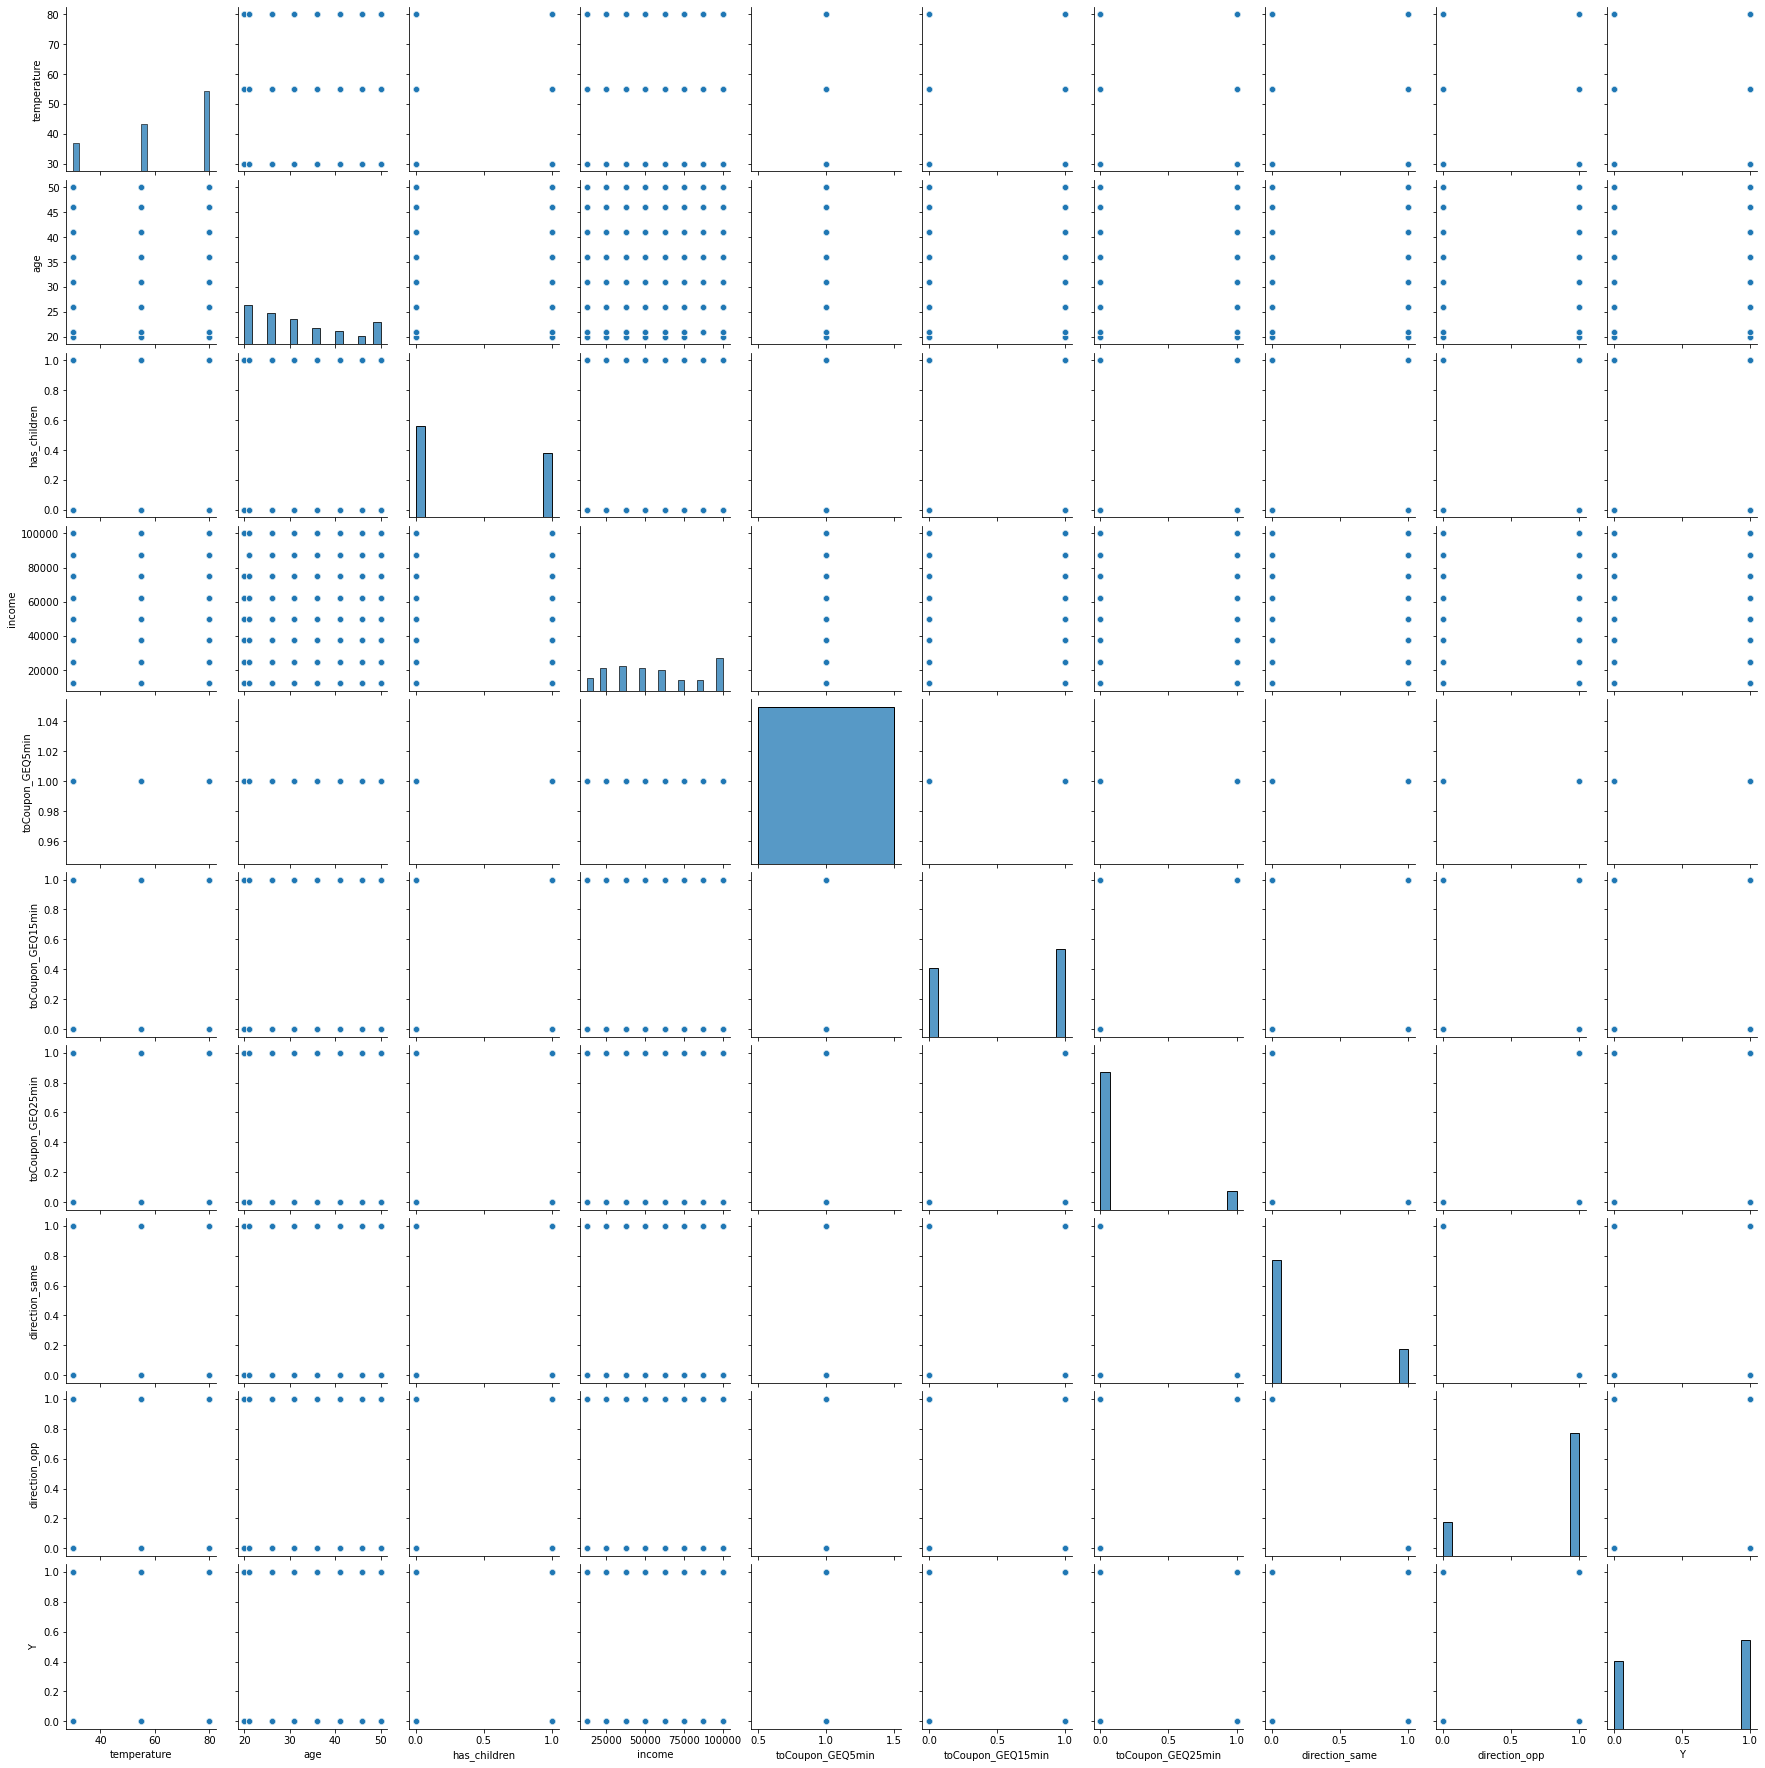

In [71]:
fig=sns.pairplot(data)
plt.savefig("images/pair_plot.png")

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [72]:
# Plot the histogram of different columns hued by acceptance column "Y"
fig=px.histogram(data, x=['expiration','destination','passanger','weather','time','coupon','gender','maritalStatus','education'],color='Y',text_auto=True)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
        margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()
fig.write_image("images/histogram_all.png")

In [73]:
# Plot the histogram of "income" column hued by acceptance column "Y"
fig=px.histogram(data, x=['income'],color='Y',text_auto=True)
fig.show()
fig.write_image("images/histogram_income.png")